In [150]:
using LinearAlgebra, Symbolics, Latexify, CairoMakie, Graphs, SimpleWeightedGraphs, GraphMakie
import Printf.@printf
import GraphMakie.SquareGrid, GraphMakie.Shell

# Why must CairoMakie take so long to compile 😢

A quick note on Latexify:

Throughout this notebook will be calls to the function `latexify()` and macro `@latexdefine`. These are just handy ways to convert any julia expression or variable directly into a latex formatted string.

Passing that string to `display` will result in some nicely rendered $\LaTeX$. I endeavor to keep all the relevant calculations for the understanding of the text seperate from such display functions.

## Eigenvalues and Eigenvectors

Eigenvectors are charecteristc vectors $V$ of a square matrix $A$ if when multiplied by A, only its magnitude changes by a factor of $c$, the vector's corresponding eigenvalue. This is shown as

$$
AV = c\cdot A
$$

In [151]:
# Create a square matrix
A = rand(-9:9, 3,3) + im*rand(-9:9, 3,3)
# Display it with some pretty latex
display(@latexdefine(A))

# Get the eigen decomposition
eigenvalues, eigenvectors = eigen(A)
# Display the vals and vecs
display(@latexdefine(eigenvalues, fmt="%.3f"))
display(@latexdefine(eigenvectors, fmt="%.3f"))

L"$A = \left[
\begin{array}{ccc}
-8+3\mathit{i} & -7-8\mathit{i} & 2+8\mathit{i} \\
5+1\mathit{i} & -3+7\mathit{i} & 5-5\mathit{i} \\
8-5\mathit{i} & 1-1\mathit{i} & 5-1\mathit{i} \\
\end{array}
\right]$"

L"$eigenvalues = \left[
\begin{array}{c}
-10.449+6.172\mathit{i} \\
-1.038+0.618\mathit{i} \\
5.487+2.211\mathit{i} \\
\end{array}
\right]$"

L"$eigenvectors = \left[
\begin{array}{ccc}
0.768+0.000\mathit{i} & -0.480-0.090\mathit{i} & -0.172+0.294\mathit{i} \\
-0.347-0.371\mathit{i} & 0.611-0.064\mathit{i} & 0.416-0.105\mathit{i} \\
-0.384+0.072\mathit{i} & 0.620+0.000\mathit{i} & 0.837+0.000\mathit{i} \\
\end{array}
\right]$"

In [152]:
# Show Example calculation
AV = A*eigenvectors[:,1]
display(@latexdefine(AV, fmt="%.3f"))

cV = eigenvalues[1] * eigenvectors[:,1]
display(@latexdefine(cV, fmt="%.3f"))

L"$AV = \left[
\begin{array}{c}
-8.023+4.739\mathit{i} \\
5.909+1.733\mathit{i} \\
3.575-3.121\mathit{i} \\
\end{array}
\right]$"

L"$cV = \left[
\begin{array}{c}
-8.023+4.739\mathit{i} \\
5.909+1.733\mathit{i} \\
3.575-3.121\mathit{i} \\
\end{array}
\right]$"

In [153]:
# Show that the vectors and values satisfy the above condition
for (index, value) in enumerate(eigenvalues)
    # Display using simpler string interpolation
    check = A*eigenvectors[:,index] ≈ value*eigenvectors[:,index]
    println("A * V_$(index) == c_$(index) * V_$(index) : $(check)")
end

A * V_1 == c_1 * V_1 : true
A * V_2 == c_2 * V_2 : true
A * V_3 == c_3 * V_3 : true


## Hermitian Matrices

A matrix is **Hermitian** if it is equal to its adjoint, or conjugate transpose:

$$
H = H^\dag
$$

In [154]:
# A matrix is hermitian if it is equal to its adjoint
# Construct a hermitian matrix
A = Hermitian(rand(-9:9, 4,4) + im*rand(-9:9, 4,4))
# Display output
display(@latexdefine A)
display(@latexdefine A')
@latexdefine A' == A

L"$A = \left[
\begin{array}{cccc}
7+0\mathit{i} & \mathit{i} & 1+8\mathit{i} & -7+2\mathit{i} \\
-\mathit{i} & 5+0\mathit{i} & 7-4\mathit{i} & -9-6\mathit{i} \\
1-8\mathit{i} & 7+4\mathit{i} & 2+0\mathit{i} & -1-1\mathit{i} \\
-7-2\mathit{i} & -9+6\mathit{i} & -1+1\mathit{i} & 3+0\mathit{i} \\
\end{array}
\right]$"

L"$A' = \left[
\begin{array}{cccc}
7+0\mathit{i} & \mathit{i} & 1+8\mathit{i} & -7+2\mathit{i} \\
-\mathit{i} & 5+0\mathit{i} & 7-4\mathit{i} & -9-6\mathit{i} \\
1-8\mathit{i} & 7+4\mathit{i} & 2+0\mathit{i} & -1-1\mathit{i} \\
-7-2\mathit{i} & -9+6\mathit{i} & -1+1\mathit{i} & 3+0\mathit{i} \\
\end{array}
\right]$"

L"$\left( A' = A \right) = true$"

The operator a hermitian matrix represents is called **self-adjoint**

We are also told that $\langle AV,V' \rangle = \langle V,AV' \rangle$
which we can check:

In [155]:
# Create 2 random complex vectors
V₁ = rand(-9:9, 4) + im*rand(-9:9, 4)
V₂ = rand(-9:9, 4) + im*rand(-9:9, 4)
# compare multiplication in the dot product
(A*V₁) ⋅ V₂ == V₁ ⋅ (A*V₂)

true

We are also told that Hermitian matrices have real eigenvalues, and if the eigenvalues are distinct, then the eigen vectors are orthogonal. We can check with our matrix:

In [156]:
eigenvals, eigenvecs = eigen(A)
# Show unique, real eigen values
@latexdefine eigenvals

L"$eigenvals = \left[
\begin{array}{c}
-9.376792226622982 \\
-6.8158523138334814 \\
14.62856987470113 \\
18.564074665755363 \\
\end{array}
\right]$"

In [157]:
# Show that eigenvectors dotted on each other are 0 (approx in this case)
for i in 1:length(eigenvals)-1
    check = eigenvecs[:,i] ⋅ eigenvecs[:,i+1]
    # Some manual pretty printing
    @printf("eigenvector %i dotted on eigenvector %i is: %.3f + %.3fim\n",
        i, i+1, real(check), imag(check))
end

eigenvector 1 dotted on eigenvector 2 is: -0.000 + -0.000im
eigenvector 2 dotted on eigenvector 3 is: -0.000 + 0.000im
eigenvector 3 dotted on eigenvector 4 is: -0.000 + -0.000im


## Unitary Matrices
A matrix is **unitary** if it returns the Identity matrix when multiplied by its adjoint, ie its adjoint is its inverse:

$$
U * U^\dag = I \\
U^\dag = U^{-1}
$$

In [158]:
# Construct a unitary matrix using part of an svd
# Since the svd matrix decomposition produces a unitary matrix
U = svd(A).U

# Display
@latexdefine(U, fmt="%.3f")

L"$U = \left[
\begin{array}{cccc}
-0.221-0.232\mathit{i} & -0.412+0.600\mathit{i} & -0.233+0.024\mathit{i} & -0.444+0.341\mathit{i} \\
-0.623-0.207\mathit{i} & 0.067-0.296\mathit{i} & -0.557-0.340\mathit{i} & 0.226-0.005\mathit{i} \\
-0.371-0.178\mathit{i} & 0.447+0.134\mathit{i} & 0.167+0.180\mathit{i} & -0.474-0.573\mathit{i} \\
0.545+0.000\mathit{i} & 0.402+0.000\mathit{i} & -0.677+0.000\mathit{i} & -0.288+0.000\mathit{i} \\
\end{array}
\right]$"

In [159]:
# Check that it returns the identity matrix when multiplied with its adjoint
UU = U*U'

# Display
@latexdefine round.(UU)

L"$\left\lfloor UU\right\rceil  = \left[
\begin{array}{cccc}
1.0+0.0\mathit{i} & 0.0\mathit{i} & 0.0\mathit{i} & 0.0\mathit{i} \\
-0.0\mathit{i} & 1.0+0.0\mathit{i} & -0.0\mathit{i} & -0.0\mathit{i} \\
-0.0\mathit{i} & 0.0\mathit{i} & 1.0+0.0\mathit{i} & -0.0\mathit{i} \\
-0.0\mathit{i} & 0.0\mathit{i} & 0.0\mathit{i} & 1.0+0.0\mathit{i} \\
\end{array}
\right]$"

Unitary Matrices also preserve dot products and norms!

In [160]:
# Show that it preserves dot products
# (we use the approx b/c of floating point math errors)
(U*V₁) ⋅ (U*V₂) ≈ V₁ ⋅ V₂

true

In [161]:
# Show that it preserves norms
norm(U*V₁) ≈ norm(V₁)

true

Which also means they preserve distances, making it an **isometry**

In [162]:
# Show that it preserves distances
norm(U*V₁ - U*V₂) ≈ norm(V₁ - V₂)

true

### Tensor Products

Tensor products are a way of combining vectors and matrices that correspond to combining quantum systems.

The tensor product of vectors is defined as:

$$
\begin{bmatrix}
    a_0 \\
    a_1 \\
    a_2
\end{bmatrix}
\otimes
\begin{bmatrix}
    b_0 \\
    b_1
\end{bmatrix}
=
\begin{bmatrix}
    a_0b_0 \\
    a_0b_1 \\
    a_1b_0 \\
    a_1b_1 \\
    a_2b_0 \\
    a_2b_1
\end{bmatrix}
$$

In [163]:
function vec_tensor_prod(v1, v2)
    v1_l = length(v1)
    v2_l = length(v2)
    out = similar(v1, v1_l*v2_l)
    for i in 1:v1_l, j in 1:v2_l
        out[v2_l*(i-1)+j] = v1[i] * v2[j]
    end
    return out
end

vec_tensor_prod (generic function with 1 method)

In [164]:
# Create two simple vectors
a = rand(-9:9, 2)
b = rand(-9:9, 3)
# do the tensor product
ab = vec_tensor_prod(a, b)

# Display
display(@latexdefine(a))
display(@latexdefine(b))
display(@latexdefine(ab))

L"$a = \left[
\begin{array}{c}
3 \\
-1 \\
\end{array}
\right]$"

L"$b = \left[
\begin{array}{c}
-8 \\
7 \\
-9 \\
\end{array}
\right]$"

L"$ab = \left[
\begin{array}{c}
-24 \\
21 \\
-27 \\
8 \\
-7 \\
9 \\
\end{array}
\right]$"

The resulting vector is then of length $n*m$, where $n$ and $m$ are the lengths of the original two vectors

The cross product is also defined for matrices:

$$
\begin{bmatrix}
    a_{0,0} & a_{0,1} \\
    a_{1,0} & a_{1,1}
\end{bmatrix}
\otimes
\begin{bmatrix}
    b_{0,0} & b_{0,1} & b_{0,2} \\
    b_{1,0} & b_{1,1} & b_{1,2} \\
    b_{2,0} & b_{1,2} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
    a_{0,0} \cdot \begin{bmatrix}
        b_{0,0} & b_{0,1} & b_{0,2} \\
        b_{1,0} & b_{1,1} & b_{1,2} \\
        b_{2,0} & b_{1,2} & b_{2,2}
    \end{bmatrix} &
    a_{0,1} \cdot \begin{bmatrix}
        b_{0,0} & b_{0,1} & b_{0,2} \\
        b_{1,0} & b_{1,1} & b_{1,2} \\
        b_{2,0} & b_{1,2} & b_{2,2}
    \end{bmatrix} \\
    a_{1,0} \cdot \begin{bmatrix}
        b_{0,0} & b_{0,1} & b_{0,2} \\
        b_{1,0} & b_{1,1} & b_{1,2} \\
        b_{2,0} & b_{1,2} & b_{2,2}
    \end{bmatrix} &
    a_{1,1} \cdot \begin{bmatrix}
        b_{0,0} & b_{0,1} & b_{0,2} \\
        b_{1,0} & b_{1,1} & b_{1,2} \\
        b_{2,0} & b_{1,2} & b_{2,2}
    \end{bmatrix}
\end{bmatrix}



In [165]:
# Function that performs the tensor product on two arbitrarily sized Matrices
function tnsr_prod(A, B)
    sA = size(A)
    sB = size(B)
    AB = similar(A, sA.*sB)
    if ndims(AB) == 2 # Matrix
        for I in CartesianIndices(A)
            r_start = 1 + (sB[1]*(I[1]-1))
            r_stop  = r_start + sB[1]-1
            c_start = 1 + (sB[2]*(I[2]-1))
            c_stop  = c_start + sB[2]-1
            AB[r_start:r_stop,c_start:c_stop] .= A[I].*B
        end
    else # Vector
        for I in CartesianIndices(A)
            r_start = 1 + (sB[1]*(I[1]-1))
            r_stop  = r_start + sB[1]-1
            AB[r_start:r_stop] .= A[I].*B
        end
    end

    return AB
end

tnsr_prod (generic function with 1 method)

Now that we've made a function that works, we can define $\otimes$ as an operator to use this function!!

In [166]:
# Define ⊗ as the tensor product function
X⊗Y = tnsr_prod(X,Y)

⊗ (generic function with 1 method)

In [167]:
# Create two random matrices
A = rand(-9:9, 2,2)
B = rand(-9:9, 3,3)
# Get their tensor product
AB = A⊗B

# Display
display(@latexdefine(A))
display(@latexdefine(B))
display(@latexdefine(AB))

L"$A = \left[
\begin{array}{cc}
6 & -1 \\
3 & -1 \\
\end{array}
\right]$"

L"$B = \left[
\begin{array}{ccc}
5 & 7 & 4 \\
5 & -9 & 7 \\
-6 & 0 & -2 \\
\end{array}
\right]$"

L"$AB = \left[
\begin{array}{cccccc}
30 & 42 & 24 & -5 & -7 & -4 \\
30 & -54 & 42 & -5 & 9 & -7 \\
-36 & 0 & -12 & 6 & 0 & 2 \\
15 & 21 & 12 & -5 & -7 & -4 \\
15 & -27 & 21 & -5 & 9 & -7 \\
-18 & 0 & -6 & 6 & 0 & 2 \\
\end{array}
\right]$"

We are told a few properties of this operation:

$$
A \otimes (B \otimes C) = (A \otimes B) \otimes C \\
(A \otimes B)^\dag = A^\dag \otimes B^\dag \\
(A \otimes B) \star (V \otimes V') = A \star V \otimes B \star V'
$$

Which we can check with our matrices:

In [168]:
# Show that ⊗ is associative
C = rand(-9:9, 4,4)
A⊗(B⊗C) == (A⊗B)⊗C

true

In [169]:
# Show that the adjoing operator distributes
(A ⊗ B)' == A' ⊗ B'

true

In [170]:
# Show that last one
V₁ = rand(-9:9, 2) # match shape of A
V₂ = rand(-9:9, 3) # match shape of b
(A ⊗ B) * (V₁ ⊗ V₂) == (A * V₁) ⊗ (B * V₂)

true

## Deterministic Systems

Start with a classical system with $n$ different states. We have a number of objects (marbles) in each state at any given time. Objects can transition from one state to another, with the condition that each state can only transition to one other state.

This system can be represented as a directed graph with weights on each node representing the nuber of objects in that state (node), and arrows showing possible transitions to other states.

![](2023-01-27-17-54-14.png)

The state of the overall system can be be represented by a vector $X \in \N^n$ that contains the number of objects at each node in our graph.

$$
X = \begin{bmatrix}
    6 \\ 2 \\ 1 \\ 5 \\ 3 \\ 10
\end{bmatrix}
$$

The transitions between those states can then be represented by an $n\times n$ adjacency matrix $M$ of the graph.
Transitions are **from** the node in the **column** index **to** the node in the **row** index.

i.e. there is a transition from node (col) 2 to node (row) 3 ((1 based indexing))

$$
M = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

This is done so that multiplying this matrix with column vectors results in behavior that we discuss next.

In [171]:
# Create a graph using SimpleWeightedGraphs.jl
n = 6
g = SimpleWeightedDiGraph{Int, Int}(n)
add_edge!(g, 1, 6, 1)
add_edge!(g, 2, 3, 1)
add_edge!(g, 3, 5, 1)
add_edge!(g, 4, 4, 1)
add_edge!(g, 5, 6, 1)
add_edge!(g, 6, 3, 1)

true

In [172]:
# Get the adjacency matrix M
# We transpose b/c this method shows digraph connections
# with the opposite convention of the textbook
M = transpose(Graphs.LinAlg.adjacency_matrix(g))

# Display
display(@latexdefine(M))

L"$M = \left[
\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 1 & 0 \\
\end{array}
\right]$"

In [173]:
# Construct our vector X of the state of the system
X = [6; 2; 1; 5; 3; 10]

# Display
display(@latexdefine(X))

L"$X = \left[
\begin{array}{c}
6 \\
2 \\
1 \\
5 \\
3 \\
10 \\
\end{array}
\right]$"

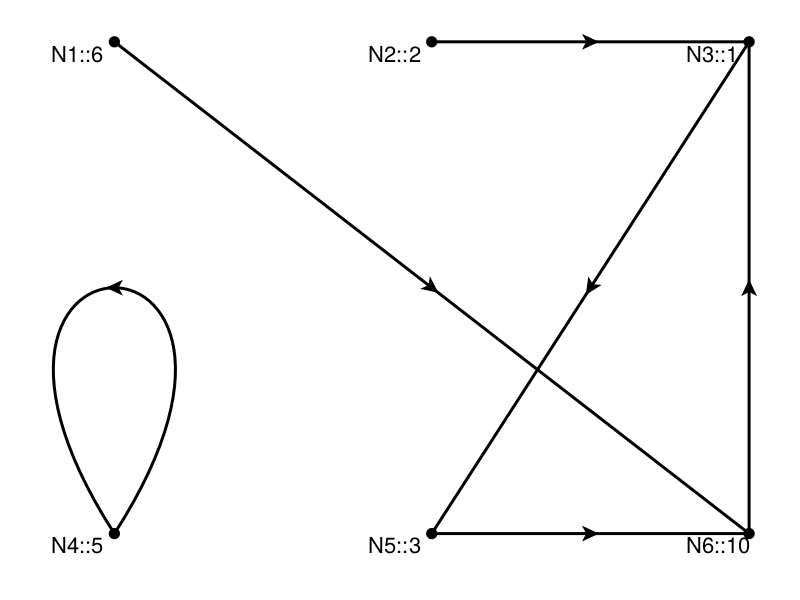

In [174]:
# Plot the Graph
f,ax,p = graphplot(g;
    layout=SquareGrid(cols=3),
    nlabels=["N$(i)::$(v)" for (i,v) in enumerate(X)],
    # nlabels_align=(:right,:center),
    # nlabels_distance=10,
    nlabels_offset=Point2f(-0.2,-0.05),
    nlabels_fontsize=22,
    edge_width=3,
    node_size=16,
    arrow_size=25
)
hidedecorations!(ax)
hidespines!(ax)
display(f)

The multiplication 

$$
MX = Y
$$

Corresponds with one time step, or "click", advancing the system forward in time according to the dynamics of the graph.
This works becuase of how we structured the matrix M earlier.

In [175]:
# Get the state after one time click
Y₁ = M*X

# Display
display(@latexdefine(Y₁))

L"$Y_1 = \left[
\begin{array}{c}
0 \\
0 \\
12 \\
5 \\
1 \\
9 \\
\end{array}
\right]$"

Doing this multiplication twice corresponds to moving the system two time clicks

In [176]:
# Get the state after two time clicks
Y₂ = M*M*X

# display
display(@latexdefine(Y₂))

L"$Y_2 = \left[
\begin{array}{c}
0 \\
0 \\
9 \\
5 \\
12 \\
1 \\
\end{array}
\right]$"

## Probabilistic Systems

Now instead of tracking many deterministic marbles, we will track a single marble.
The state of the system $X$ is no longer the number of marbles on each node, but the probability that our one marble would be found at that node.
Then the elements of $X$ must sum to 1, b/c the marble must be somewhere in the graph.
Now instead of one arrow leaving each vertex, there are many, but the sum of outgoing and incoming weights are both 1.
(This also neccesitates that a marble is just as likely to go to the state as leave, not sure exactly why this must be the case.)

For example:

![](2023-01-28-09-27-19.png)

Would be represented by the matrix

$$
M = \begin{bmatrix}
    0 & \frac{1}{6} & \frac{5}{6} \\
    \frac{1}{3} & \frac{1}{2} & \frac{1}{6} \\
    \frac{2}{3} & \frac{1}{3} & 0
\end{bmatrix}
$$

Showing that there is a $\frac{1}{6}$ chance of a marble moving from node 1 to node 0, or a $\frac{1}{2}$ chance of a marble staying on node 1.
Due to the restrictions we set earlier, each row and column of this matrix sums to 1, making the matrix **doubly stochastic**.

An initial state $X$ could be

$$
X = \begin{bmatrix}
    \frac{1}{6} \\
    \frac{1}{6} \\
    \frac{2}{3}
\end{bmatrix}
$$

In [177]:
# Create a graph using SimpleWeightedGraphs.jl
# we use rational notation x//y, which is a way to
# express fractions exactly, without converting them
# to a float
n = 3
gp = SimpleWeightedDiGraph{Int, Rational{Int}}(n)
add_edge!(gp, 1, 2, 1//3)
add_edge!(gp, 1, 3, 2//3)
add_edge!(gp, 2, 1, 1//6)
add_edge!(gp, 2, 2, 1//2)
add_edge!(gp, 2, 3, 1//3)
add_edge!(gp, 3, 1, 5//6)
add_edge!(gp, 3, 2, 1//6)
gp

{3, 7} directed simple Int64 graph with Rational{Int64} weights

In [178]:
# Get the adjacency matrix Mp
Mp = transpose(Graphs.LinAlg.adjacency_matrix(gp))

# Display
display(@latexdefine(Mp))

L"$Mp = \left[
\begin{array}{ccc}
0 & \frac{1}{6} & \frac{5}{6} \\
\frac{1}{3} & \frac{1}{2} & \frac{1}{6} \\
\frac{2}{3} & \frac{1}{3} & 0 \\
\end{array}
\right]$"

In [179]:
# Construct our vector Xp of the state of the system
Xp = [1//6; 1//6; 2//3]

# Display
display(@latexdefine(Xp))

L"$Xp = \left[
\begin{array}{c}
\frac{1}{6} \\
\frac{1}{6} \\
\frac{2}{3} \\
\end{array}
\right]$"

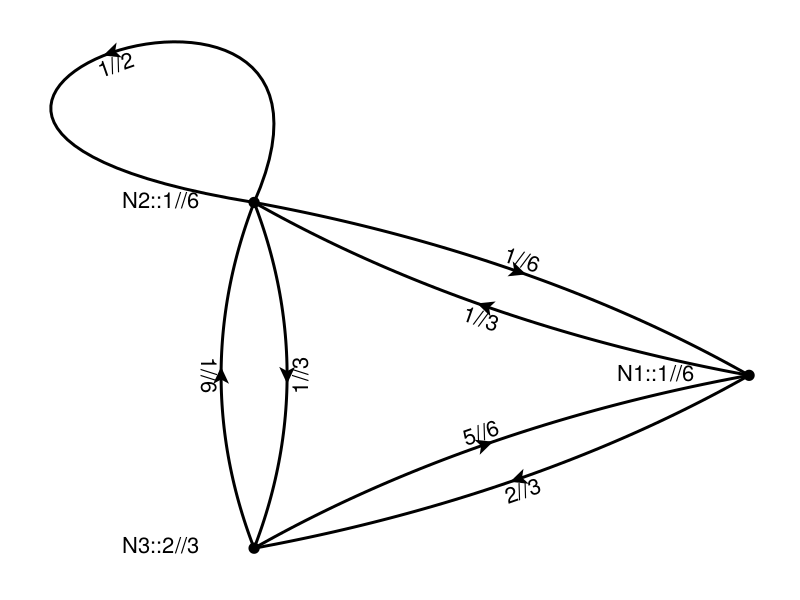

In [180]:
# Plot the Graph
f,ax,p = graphplot(gp;
    layout=Shell(),
    nlabels=["N$(i)::$(v)" for (i,v) in enumerate(Xp)],
    # nlabels_align=(:right,:center),
    # nlabels_distance=10,
    nlabels_offset=Point2f(-0.4,-0.05),
    nlabels_fontsize=22,
    elabels=[repr(e.weight) for e in edges(gp)],
    elabels_fontsize=22,
    edge_width=3,
    node_size=16,
    arrow_size=25
)
hidedecorations!(ax)
hidespines!(ax)
display(f)

Like before, the multiplication 

$$
MpXp = Yp
$$

Corresponds with one time step, or "click", advancing the system forward in time according to the dynamics of the graph

In [181]:
# Get the state after one time click
Yp₁ = Mp*Xp

# Display
display(@latexdefine(Yp₁))

L"$Yp_1 = \left[
\begin{array}{c}
\frac{7}{12} \\
\frac{1}{4} \\
\frac{1}{6} \\
\end{array}
\right]$"

Again, doing this multiplication multiple times results in the state of the system after multiple steps. 
This means that the product of two doubly stochastic matrices is also doubly stochastic!

In [182]:
# Get the state after 2 time clicks
Yp₂ =Mp*Mp*Xp

# Display
display(@latexdefine(Yp₂))

L"$Yp_2 = \left[
\begin{array}{c}
\frac{13}{72} \\
\frac{25}{72} \\
\frac{17}{36} \\
\end{array}
\right]$"

If we were to left multiply a stochastic row vector to the matrix $M$, we would also get a stochastic vector output.

$$
X_{row}\times M = Y_{row} \\
\begin{bmatrix}
    \frac{1}{6} &
    \frac{1}{6} &
    \frac{2}{3}
\end{bmatrix}
\times
\begin{bmatrix}
    0 & \frac{1}{6} & \frac{5}{6} \\
    \frac{1}{3} & \frac{1}{2} & \frac{1}{6} \\
    \frac{2}{3} & \frac{1}{3} & 0
\end{bmatrix}
=
\begin{bmatrix}
    \frac{7}{12} & \frac{1}{4} & \frac{1}{6}
\end{bmatrix}
$$

This would correspond to right multiplying that vector by the transpose of $M$.

$$
X_{row}\times M = Y_{row} \\
(X_{row}\times M)^T = Y_{row}^T \\
M^T \times X = Y \\
$$

The matrix $M^T$ corresponds to the graph with the edges reversed.
This means that multiplying by $M^T$ is akin to moving the system in reverse.

$$
M^T \times X = Y_{-1}
$$

In [183]:
# Show that left multiplying by the row form of the vector
# is the same as right multiplying the transpose of M
Xp' * Mp == (Mp' * Xp)'

true

However, it doesn't quite work here, because in this system, the matrix $M$ is not unitary, so they can be multiplied one after the other to get back to the same state.

In [184]:
display(@latexdefine(Mp * Mp' * Xp))
display(@latexdefine(Xp))

L"$Mp \cdot Mp' \cdot Xp = \left[
\begin{array}{c}
\frac{7}{36} \\
\frac{13}{36} \\
\frac{4}{9} \\
\end{array}
\right]$"

L"$Xp = \left[
\begin{array}{c}
\frac{1}{6} \\
\frac{1}{6} \\
\frac{2}{3} \\
\end{array}
\right]$"

### Ex: Stochastic Billiard Ball

Consider the graph

![](2023-01-28-14-59-18.png)

With initial state 

$$
X = \begin{bmatrix}
    1 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

How does the billiard ball behave?

In [185]:
# Create a graph using SimpleWeightedGraphs.jl
n = 4
gsb = SimpleWeightedDiGraph{Int, Rational{Int}}(n)
add_edge!(gsb, 1, 2, 1//2)
add_edge!(gsb, 1, 4, 1//2)
add_edge!(gsb, 2, 3, 1//2)
add_edge!(gsb, 2, 1, 1//2)
add_edge!(gsb, 3, 4, 1//2)
add_edge!(gsb, 3, 2, 1//2)
add_edge!(gsb, 4, 1, 1//2)
add_edge!(gsb, 4, 3, 1//2)
gsb

{4, 8} directed simple Int64 graph with Rational{Int64} weights

In [186]:
# Get the adjacency matrix Mp
Msb = transpose(Graphs.LinAlg.adjacency_matrix(gsb))

# Display
display(@latexdefine(Msb))

L"$Msb = \left[
\begin{array}{cccc}
0 & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} & 0 \\
0 & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} & 0 \\
\end{array}
\right]$"

In [187]:
# Construct our vector Xp of the state of the system
Xsb = [1; 0; 0; 0]

# Display
display(@latexdefine(Xsb))

L"$Xsb = \left[
\begin{array}{c}
1 \\
0 \\
0 \\
0 \\
\end{array}
\right]$"

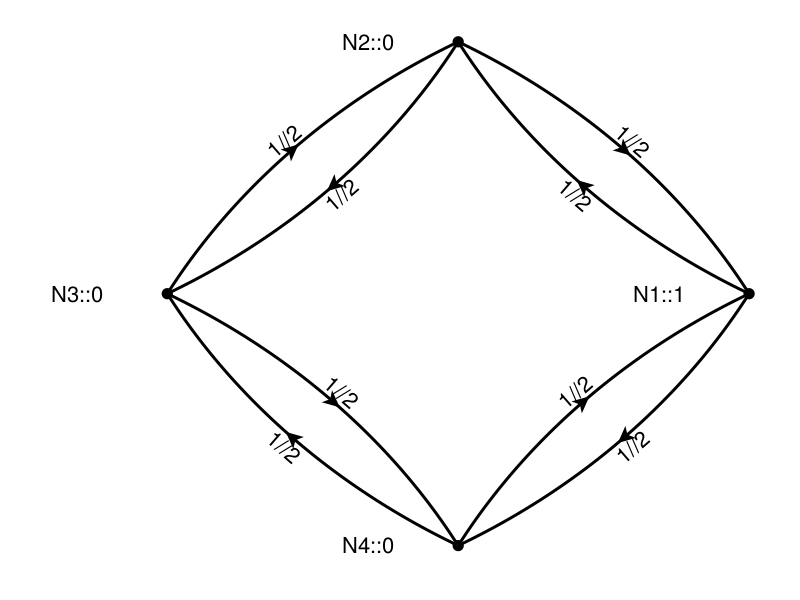

In [188]:
# Plot the Graph
f,ax,p = graphplot(gsb;
    layout=Shell(),
    nlabels=["N$(i)::$(v)" for (i,v) in enumerate(Xsb)],
    # nlabels_align=(:right,:center),
    # nlabels_distance=10,
    nlabels_offset=Point2f(-0.4,-0.05),
    nlabels_fontsize=22,
    elabels=[repr(e.weight) for e in edges(gsb)],
    elabels_fontsize=22,
    edge_width=3,
    node_size=16,
    arrow_size=25
)
hidedecorations!(ax)
hidespines!(ax)
display(f)

In [189]:
# Calculate the state after 1 time click
Ysb₁ = Msb * Xsb

# Display
display(@latexdefine(Ysb₁))

L"$Ysb_1 = \left[
\begin{array}{c}
0 \\
\frac{1}{2} \\
0 \\
\frac{1}{2} \\
\end{array}
\right]$"

In [190]:
# Calculate the state after 2 time clicks
Ysb₂ = Msb * Msb * Xsb

# Display
display(@latexdefine(Ysb₂))

L"$Ysb_2 = \left[
\begin{array}{c}
\frac{1}{2} \\
0 \\
\frac{1}{2} \\
0 \\
\end{array}
\right]$"

In [191]:
# 3 time clicks?
Ysb₃ = Msb * Msb * Msb * Xsb

# Display
display(@latexdefine(Ysb₃))

L"$Ysb_3 = \left[
\begin{array}{c}
0 \\
\frac{1}{2} \\
0 \\
\frac{1}{2} \\
\end{array}
\right]$"

The Ball starts bouncing back and forth between the same states!

### Ex: Stochastic Double Slit Experiment

For this non-quantum double slit experiment, that is not physically possible, but is used to build up the concept of describing systems with stoachastic matrices and vectors, we have a system that looks like this:

![](2023-01-29-10-39-53.png)

With a corresponding graph representation:

![](2023-01-29-10-36-16.png)

Here the non-quantum object, in this case a bullet, starts at the left.
It can enter either slit with a 1/2 probability.
It can then leave the slit to hit any of three targets with equal probability.
Once the bullet hits a target, it stays there.
Note, this means that matrix describing this system will not be doubly stochastic.
That is overlooked for now, just so we can illustrate some points about the system.

The matrix describing the system would be:

$$
Msd = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & \frac{1}{3} & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & \frac{1}{3} & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & \frac{1}{3} & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & \frac{1}{3} & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

The Initial state would be:

$$
Xsd = \begin{bmatrix}
    1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

In [192]:
# Create a graph using SimpleWeightedGraphs.jl
n = 8
gsd = SimpleWeightedDiGraph{Int, Rational{Int}}(n)
add_edge!(gsd, 1, 2, 1//2)
add_edge!(gsd, 1, 3, 1//2)
add_edge!(gsd, 2, 4, 1//3)
add_edge!(gsd, 2, 5, 1//3)
add_edge!(gsd, 2, 6, 1//3)
add_edge!(gsd, 3, 6, 1//3)
add_edge!(gsd, 3, 7, 1//3)
add_edge!(gsd, 3, 8, 1//3)
add_edge!(gsd, 4, 4, 1)
add_edge!(gsd, 5, 5, 1)
add_edge!(gsd, 6, 6, 1)
add_edge!(gsd, 7, 7, 1)
add_edge!(gsd, 8, 8, 1)
gsd

{8, 13} directed simple Int64 graph with Rational{Int64} weights

In [193]:
# Get the adjacency matrix Mp
Msd = transpose(Graphs.LinAlg.adjacency_matrix(gsd))

# Display
display(@latexdefine(Msd))

L"$Msd = \left[
\begin{array}{cccccccc}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{3} & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{3} & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{3} & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & \frac{1}{3} & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right]$"

In [196]:
# Construct our vector Xp of the state of the system
Xsd = [1; 0; 0; 0; 0; 0; 0; 0]

# Display
display(@latexdefine(Xsd))

L"$Xsd = \left[
\begin{array}{c}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]$"

In [222]:
# function to layout the graph nicely
function DoubleSlit()
    return function (g)
        points = Vector{Point2f}(undef, 8)
        points[1] = Point2f(0,0)
        points[2] = Point2f(1,1)
        points[3] = Point2f(1,-1)
        points[4] = Point2f(2,2)
        points[5] = Point2f(2,1)
        points[6] = Point2f(2,0)
        points[7] = Point2f(2,-1)
        points[8] = Point2f(2,-2)
        return points
    end
end

DoubleSlit (generic function with 2 methods)

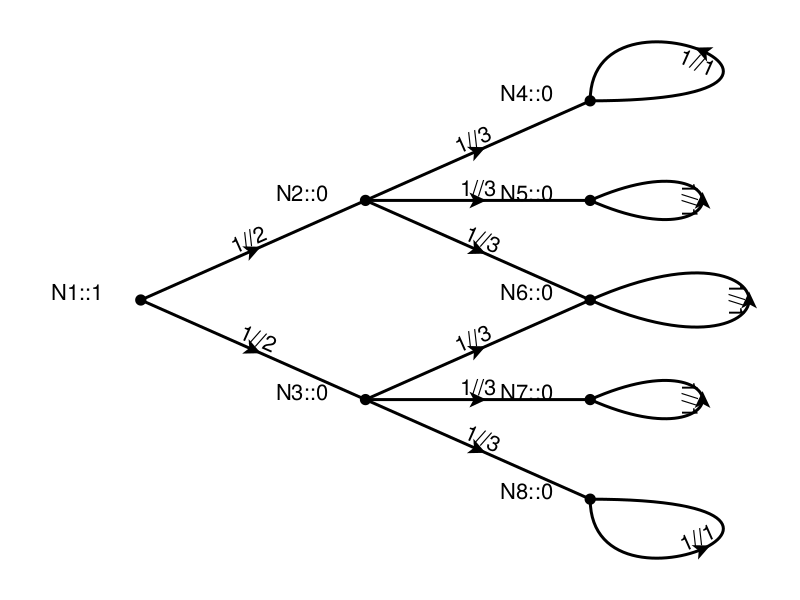

In [223]:
# Plot the Graph
f,ax,p = graphplot(gsd;
    layout=DoubleSlit(),
    nlabels=["N$(i)::$(v)" for (i,v) in enumerate(Xsd)],
    # nlabels_align=(:right,:center),
    # nlabels_distance=10,
    nlabels_offset=Point2f(-0.4,-0.05),
    nlabels_fontsize=22,
    elabels=[repr(e.weight) for e in edges(gsd)],
    elabels_fontsize=22,
    edge_width=3,
    node_size=16,
    arrow_size=25
)
hidedecorations!(ax)
hidespines!(ax)
display(f)

In [225]:
# Calculate the state after 1 time click
Ysd₁ = Msd * Xsd

# Display
display(@latexdefine(Ysd₁))

L"$Ysd_1 = \left[
\begin{array}{c}
0 \\
\frac{1}{2} \\
\frac{1}{2} \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]$"

In [226]:
# Calculate the state after 1 time click
Ysd₂ = Msd * Msd * Xsd

# Display
display(@latexdefine(Ysd₂))

L"$Ysd_2 = \left[
\begin{array}{c}
0 \\
0 \\
0 \\
\frac{1}{6} \\
\frac{1}{6} \\
\frac{1}{3} \\
\frac{1}{6} \\
\frac{1}{6} \\
\end{array}
\right]$"

The middle target actually has a 1/3 chance of being hit, since it could be hit from either slit, it is twice as likely as being hit as the other targets.